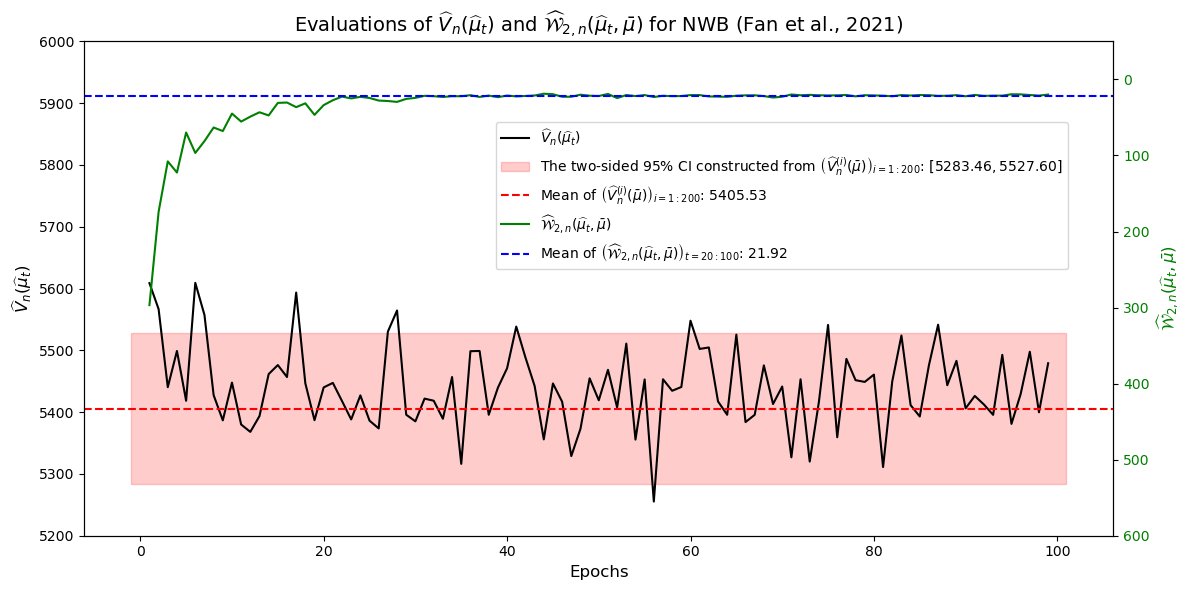

In [10]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import pickle

V_value_dirc = "/Users/zeyichen/GitHub/Repo/WB_Algo/ICNN_Fan/notebooks/results/ICNN_5_seed_1009_samples_5000_dim_2/evaluated_samples/V_values"
W2_to_true_dirc = "/Users/zeyichen/GitHub/Repo/WB_Algo/ICNN_Fan/notebooks/results/ICNN_5_seed_1009_samples_5000_dim_2/evaluated_samples/W2_to_true_bary"

# Load the JSON files
with open(f"{V_value_dirc}/V_values.json", "r") as file1:
    v_data = json.load(file1)

with open(f"{W2_to_true_dirc}/W2_to_true_bary.json", "r") as file2:
    w2_data = json.load(file2)

# Extract values for V_values
with open(f"{V_value_dirc}/true_V_values.pkl", "rb") as f:
    true_v_value_record = pickle.load(f)
v_iterations = [int(key.split("_")[1]) for key in v_data.keys() if key.startswith("epoch")]
v_values = [v_data[key] for key in v_data.keys() if key.startswith("epoch")]

# Extract values for W2_to_bary
w2_iterations = [int(key.split("_")[1]) for key in w2_data.keys()]
w2_values = [w2_data[key] for key in w2_data.keys()]

# Filter iterations to include only up to iteration 15 for both
max_iteration = 100
filtered_v_iterations = [i for i in v_iterations if i <= max_iteration]
filtered_v_values = [v_values[v_iterations.index(i)] for i in filtered_v_iterations]
filtered_w2_iterations = [i for i in w2_iterations if i <= max_iteration]
filtered_w2_values = [w2_values[w2_iterations.index(i)] for i in filtered_w2_iterations]

# Calculate statistics for true_V_values
mean_true_V = np.mean(true_v_value_record)
std_true_V = np.std(true_v_value_record)
conf_interval = stats.norm.interval(0.95, loc=mean_true_V, scale=std_true_V)

# Create a plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot V_values on the left y-axis
conf_interval_label = (
    r"The two-sided 95% CI constructed from $\left(\widehat{V}_n^{(i)}(\bar{\mu})\right)_{i = 1: 200}$: "
    f"$[{conf_interval[0]:.2f}, {conf_interval[1]:.2f}]$"
)
mean_true_V_label = (
    r"Mean of $\left(\widehat{V}_n^{(i)}(\bar{\mu})\right)_{i = 1: 200}$: "
    f"{mean_true_V:.2f}"
)
ax1.plot(filtered_v_iterations, filtered_v_values, label=r"$\widehat{V}_n(\widehat{\mu}_t)$", color="black", linestyle="-")
ax1.fill_between(
    range(-1, max_iteration + 2),  # Extend the region beyond the iteration range
    conf_interval[0], 
    conf_interval[1], 
    color="red", 
    alpha=0.2, 
    label=conf_interval_label
)  # Shadow the confidence interval
ax1.axhline(y=mean_true_V, color="red", linestyle="--", label=mean_true_V_label)
ax1.set_xlabel("Epochs", fontsize=12)
ax1.set_ylabel(r"$\widehat{V}_n(\widehat{\mu}_t)$", fontsize=12, color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.set_ylim(5200, 6000)

# Annotate each point with its value
# for i, v in zip(filtered_v_iterations, filtered_v_values):
#     ax1.text(i, v, f"{v:.2f}", color="black", fontsize=9, ha="center", va="bottom")

# Add annotation for the mean
# ax1.text(
#     filtered_v_iterations[0] - 2, 
#     mean_true_V, 
#     f"Mean: {mean_true_V:.2f}", 
#     color="red", 
#     fontsize=9, 
#     va="bottom", 
#     ha="left"
# )

# Create a secondary y-axis for W2 values
ax2 = ax1.twinx()
ax2.plot(
    filtered_w2_iterations, 
    filtered_w2_values, 
    label=r"$\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})$", 
    color="green", 
    linestyle="-"
)
ax2.set_ylabel(r"$\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})$", fontsize=12, color="green")
ax2.tick_params(axis="y", labelcolor="green")
ax2.invert_yaxis()  # Reverse the secondary y-axis
ax2.set_ylim(600, -50)

mean_w2 = np.mean(filtered_w2_values[20:])
mean_w2_label = (
                r"Mean of $\left(\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})\right)_{t = 20: 100}$: " 
                f"{mean_w2:.2f}"
                )
ax2.axhline(y=mean_w2, color="blue", linestyle="--", label=mean_w2_label)

# Annotate each point with its value
# for i, v in zip(filtered_w2_iterations, filtered_w2_values):
#     ax2.text(i, v, f"{v:.2f}", color="green", fontsize=9, ha="center", va="bottom")

# Add title and legends
plt.title(r"Evaluations of $\widehat{V}_n(\widehat{\mu}_t)$ and $\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})$ for NWB (Fan et al., 2021)", fontsize=14)
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.8), fontsize=10)

# Show the plot
plot_save_path = "/Users/zeyichen/GitHub/Repo/WB_Algo/ICNN_Fan/notebooks/results/ICNN_5_seed_1009_samples_5000_dim_2/V_and_W2_comparison_with_conf_interval.png"
plt.savefig(plot_save_path)
plt.show()


In [2]:
dim = 2
num_samples = 5000
num_measures = 5
iter = 0
truncated_radius = 150
seed = 1009

In [5]:
import os
# find the epoch index where the w2 value is the smallest
min_w2_index = np.argmin(filtered_w2_values)
evaluation_save_path = f"./results/ICNN_{num_measures}_seed_{seed}_samples_{num_samples}_dim_{dim}/evaluated_samples"
os.makedirs(evaluation_save_path, exist_ok=True)
approximated_bary_samples = pd.read_csv(f"{evaluation_save_path}/csv_files/outputs_NWBFanTaghvaeiChen_samples_epoch_{min_w2_index + 1}.csv", header = None)[:2000].to_numpy()


In [7]:
import numpy as np
# import GPUtil
# Get the parent folder path (folder K)
import sys
import os
parent_folder_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

print(parent_folder_path)

sys.path.append(parent_folder_path)
from CNX.cfg import CNXCfgCustom as Cfg_class
import CNX.compare_dist_results as CDR
import optimal_transport_modules.pytorch_utils as PTU
import optimal_transport_modules.plot_utils as PLU
import optimal_transport_modules.data_utils as DTU
import jacinle.io as io
import pandas as pd

import pickle
folder_classes_path = os.path.join(parent_folder_path, 'classes')
sys.path.append(folder_classes_path)
from entropic_iterative_scheme import save_data, W2_pot

from true_WB import *
from input_generate_plugin import *
from entropic_estimate_OT import *
from entropic_iterative_scheme import *
from config_log import *
from measure_visualize import *
from input_generate_entropy import *
from sample_plot import *

/Users/zeyichen/GitHub/Repo/WB_Algo/ICNN_Fan


In [9]:
dim = approximated_bary_samples.shape[1]
if dim > 2:
    # Perform PCA to reduce dimensions to 2D
    pca = PCA(n_components=2)
    samples = pca.fit_transform(approximated_bary_samples)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
# Use a black background
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
# Set axis limits to include all samples and contours


ax.set_xlim(-120, 100)
ax.set_ylim(-100, 100)
# Get KDE data
x_mesh, y_mesh, kde_values = get_kde_data(approximated_bary_samples)
# Plot KDE as a contour plot
h = ax.contourf(x_mesh, y_mesh, kde_values, levels=200, cmap='hot')
# Overlay scatter plot if requested

# Set title and labels
ax.set_title('Samples', color='white')
ax.set_xlabel('X1', color='white')
ax.set_ylabel('X2', color='white')

# Adjust axis colors for visibility on black background
ax.tick_params(colors='white')
# Add a colorbar
cbar = fig.colorbar(h, ax=ax)
cbar.ax.yaxis.set_tick_params(color='white')
cbar.outline.set_edgecolor('white')


os.makedirs(evaluation_save_path, exist_ok=True)
# Save the figure
plt.savefig(f"{evaluation_save_path}/approximated_bary_plot.png", facecolor='black')
# Close the plot to free memory
plt.close()

